In [5]:
#!pip install pytesseract

In [4]:
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
image = "predict.jpg"

In [7]:
def plot_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

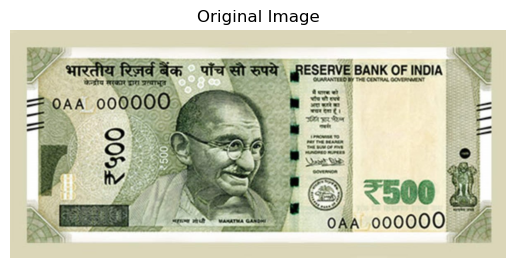

In [8]:
img = cv2.imread(image)
plot_image(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'Original Image')

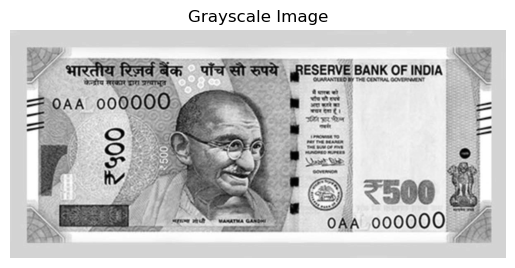

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plot_image(gray, 'Grayscale Image')

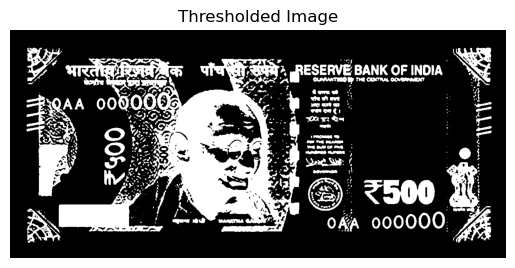

In [10]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plot_image(thresh, 'Thresholded Image')

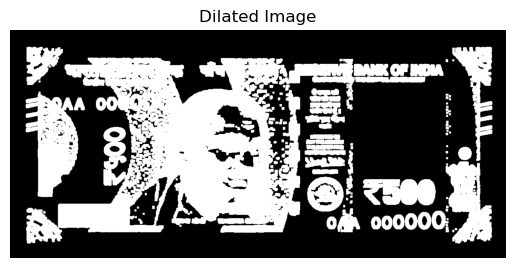

In [11]:
kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(thresh, kernel, iterations=1)
plot_image(dilation, 'Dilated Image')

In [12]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

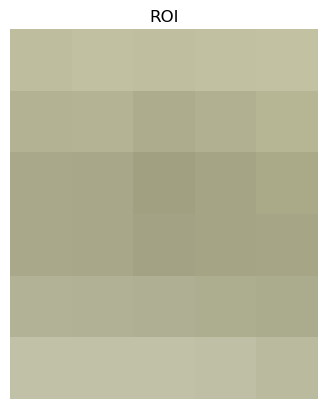

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [13]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    roi = img[y:y + h, x:x + w]
    plot_image(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB), 'ROI')
    text = pytesseract.image_to_string(roi, lang='eng', config='--psm 6')
    if text:
        print("Denomination: ", text)